In [1]:
# 필요한 라이브러리 임포트
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [2]:
# 1. 데이터 생성
# - 군집화 실험에 적합한 샘플 데이터를 생성합니다.
# - make_blobs: 클러스터가 명확히 구분되는 데이터셋 생성
data, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.7,
random_state=42)


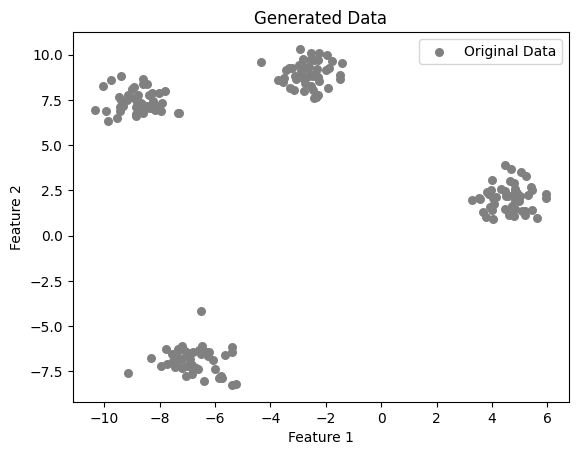

In [4]:
# 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [5]:
# 2. 계층적 군집화 적용
# - linkage 함수를 사용하여 클러스터 간의 거리 계산
# - method='ward': Ward's method로 데이터 간 거리 기반 병합
linked = linkage(data, method='ward')


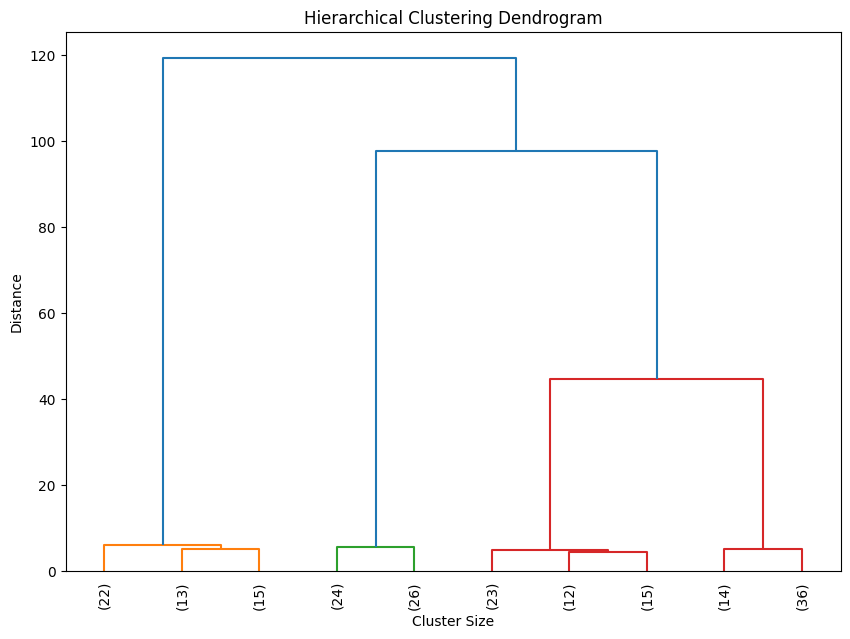

In [9]:
# 3. 덴드로그램 시각화
# - linkage 결과를 기반으로 덴드로그램을 생성합니다.
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [7]:
# 4. 클러스터 형성
# - fcluster: 덴드로그램의 특정 거리 기준으로 클러스터를 형성
# - t=7: 클러스터를 나누는 임계값 (거리 기준)
cluster_labels = fcluster(linked, t=7, criterion='distance')

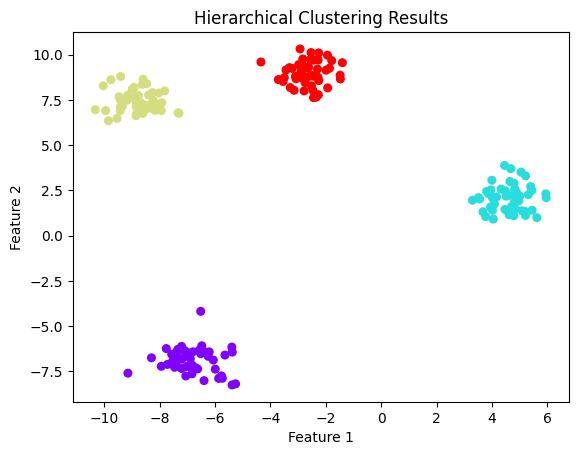

In [8]:
# 5. 결과 시각화
# - 각 클러스터를 색상으로 구분하여 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()